# **Course 4A: Deep Learning for Computer Vision**

### Check the paths and ensure the images are being loaded correctly

In [1]:
!pip install opencv-python
!pip install tensorflow


# Import necessary libraries
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define data paths and classes
dataset_path = 'tomato'
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
classes = ["Bacterial_spot", "Early_blight", "healthy", "Late_blight", "Leaf_Mold",
           "Septoria_Leaf_spot", "Spider_mites_Two_spotted_spider_mite",
           "Target_Spot", "Tomato_Mosaic_virus", "Tomato_Yellow_Leaf_Curl_Virus"]

# Check if the directories exist and list some files
print("Train directory exists:", os.path.exists(train_path))
print("Test directory exists:", os.path.exists(test_path))

for class_name in classes:
    train_class_dir = os.path.join(train_path, class_name)
    test_class_dir = os.path.join(test_path, class_name)
    print(f"Train directory for {class_name} exists:", os.path.exists(train_class_dir))
    print(f"Test directory for {class_name} exists:", os.path.exists(test_class_dir))
    if os.path.exists(train_class_dir):
        print(f"Number of images in train/{class_name}:", len(os.listdir(train_class_dir)))
    if os.path.exists(test_class_dir):
        print(f"Number of images in test/{class_name}:", len(os.listdir(test_class_dir)))

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

print("Number of samples in training set:", train_generator.samples)
print("Number of samples in test set:", test_generator.samples)


Train directory exists: True
Test directory exists: True
Train directory for Bacterial_spot exists: True
Test directory for Bacterial_spot exists: True
Number of images in train/Bacterial_spot: 1701
Number of images in test/Bacterial_spot: 426
Train directory for Early_blight exists: True
Test directory for Early_blight exists: True
Number of images in train/Early_blight: 800
Number of images in test/Early_blight: 200
Train directory for healthy exists: True
Test directory for healthy exists: True
Number of images in train/healthy: 1272
Number of images in test/healthy: 319
Train directory for Late_blight exists: True
Test directory for Late_blight exists: True
Number of images in train/Late_blight: 1527
Number of images in test/Late_blight: 382
Train directory for Leaf_Mold exists: True
Test directory for Leaf_Mold exists: True
Number of images in train/Leaf_Mold: 800
Number of images in test/Leaf_Mold: 200
Train directory for Septoria_Leaf_spot exists: True
Test directory for Septori

### Verify the data structure

In [2]:

# Import necessary libraries
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define data paths and classes
dataset_path = 'tomato'
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
classes = ["Bacterial_spot", "Early_blight", "healthy", "Late_blight", "Leaf_Mold",
           "Septoria_Leaf_spot", "Spider_mites_Two_spotted_spider_mite",
           "Target_Spot", "Tomato_Mosaic_virus", "Tomato_Yellow_Leaf_Curl_Virus"]

# Print the contents of your training and test directories to verify structure
!ls "{train_path}"
!ls "{test_path}"

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Check if the generators found any images
print("Number of samples in training set:", train_generator.samples)
print("Number of samples in test set:", test_generator.samples)

Bacterial_spot                       Spider_mites_Two_spotted_spider_mite
Early_blight                         Target_Spot
Late_blight                          Tomato_Mosaic_virus
Leaf_Mold                            Tomato_Yellow_Leaf_Curl_Virus
Septoria_Leaf_spot                   healthy
Bacterial_spot                       Spider_mites_Two_spotted_spider_mite
Early_blight                         Target_Spot
Late_blight                          Tomato_Mosaic_virus
Leaf_Mold                            Tomato_Yellow_Leaf_Curl_Virus
Septoria_Leaf_spot                   healthy
Found 15064 images belonging to 10 classes.
Found 3771 images belonging to 10 classes.
Number of samples in training set: 15064
Number of samples in test set: 3771


### **Define the CNN Model:** Constructs the CNN model with Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, and Dense layers.

Found 15064 images belonging to 10 classes.
Found 3771 images belonging to 10 classes.
Class indices: {'Bacterial_spot': 0, 'Early_blight': 1, 'Late_blight': 2, 'Leaf_Mold': 3, 'Septoria_Leaf_spot': 4, 'Spider_mites_Two_spotted_spider_mite': 5, 'Target_Spot': 6, 'Tomato_Mosaic_virus': 7, 'Tomato_Yellow_Leaf_Curl_Virus': 8, 'healthy': 9}
Number of training samples: 15064
Number of validation samples: 3771
(32, 128, 128, 3) (32, 10)
(32, 128, 128, 3) (32, 10)
Epoch 1/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 80s 167ms/step - accuracy: 0.5421 - loss: 1.4936 - val_accuracy: 0.1891 - val_loss: 5.4757 - learning_rate: 0.0010
Epoch 2/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 78s 165ms/step - accuracy: 0.7564 - loss: 0.7215 - val_accuracy: 0.5898 - val_loss: 1.7227 - learning_rate: 0.0010
Epoch 3/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - accuracy: 0.7992 - loss: 0.5879 - val_accuracy: 0.7836 - val_loss: 0.6453 - learning_rate: 0.0010
Epoch 4/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 78s 164ms/step - accuracy: 0.8341

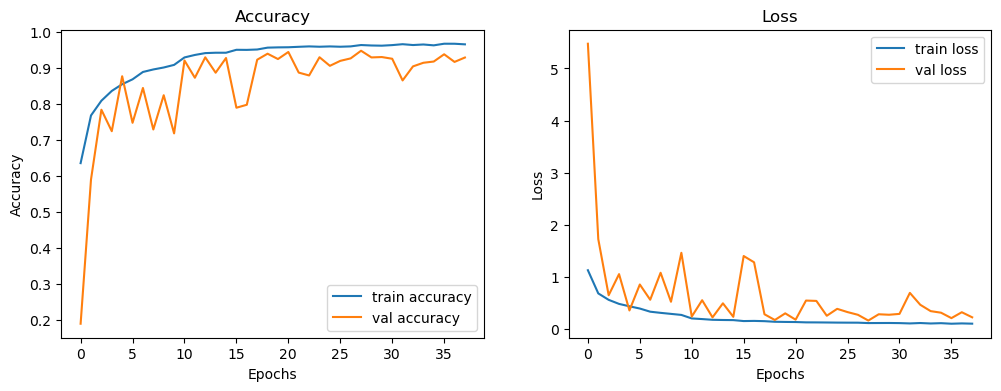

Model training complete.


In [4]:
# Install necessary packages if not already installed
!pip install opencv-python tensorflow matplotlib

# Import necessary libraries
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the full path to the dataset
dataset_path = 'tomato'
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Check if the directory exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset path {dataset_path} does not exist.")
if not os.path.exists(train_path):
    raise FileNotFoundError(f"Training path {train_path} does not exist.")
if not os.path.exists(test_path):
    raise FileNotFoundError(f"Test path {test_path} does not exist.")

# Define the classes
classes = ["Bacterial_spot", "Early_blight", "healthy", "Late_blight", "Leaf_Mold",
           "Septoria_Leaf_spot", "Spider_mites_Two_spotted_spider_mite",
           "Target_Spot", "Tomato_Mosaic_virus", "Tomato_Yellow_Leaf_Curl_Virus"]

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Print debug information
print("Class indices:", train_generator.class_indices)
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", test_generator.samples)

# Validate data generator output shapes
for data, labels in train_generator:
    print(data.shape, labels.shape)
    break

for data, labels in test_generator:
    print(data.shape, labels.shape)
    break

# Define the CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("Model training complete.")


### **Evaluating the Model on Test Data:**
### After training the model, evaluate its performance on the test data using the evaluate method of the model object.

In [5]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9500 - loss: 0.1594
Test Accuracy: 0.9475
Test Loss: 0.1591


# **Visualizing Training History:**
### Visualize the training and validation accuracy and loss over epochs, you can reuse the plotting code used during training

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,338 (12.62 MB)

 Trainable params: 3,306,634 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 80s 166ms/step - accuracy: 0.9230 - loss: 0.2261 - val_accuracy: 0.7759 - val_loss: 1.1126 - learning_rate: 0.0010
Epoch 2/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - accuracy: 0.9323 - loss: 0.1973 - val_accuracy: 0.9067 - val_loss: 0.3041 - learning_rate: 0.0010
Epoch 3/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - accuracy: 0.9357 - loss: 0.1927 - val_accuracy: 0.7375 - val_loss: 0.9192 - learning_rate: 0.0010
Epoch 4/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 80s 168ms/step - accuracy: 0.9416 - loss: 0.1778 - val_accuracy: 0.8565 - val_loss: 0.5423 - learning_rate: 0.0010
Epoch 5/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - accuracy: 0.9401 - loss: 0.1760 - val_accuracy: 0.5980 - val_loss: 2.0850 - learning_rate: 0.0010
Epoch 6/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - accuracy: 0.9408 - loss: 0.1789 - val_accuracy: 0.7810 - val_loss: 0.9607 - learning_rate: 0.0010
Epoch 7/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 78s 165ms/step - accuracy: 0.9

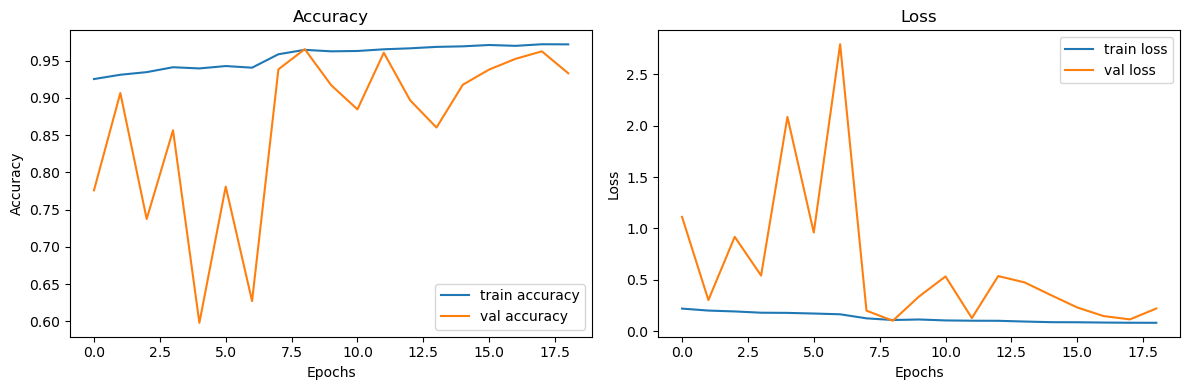

Model evaluation complete.


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Model evaluation complete.")


### To save the trained model after training, use the save method provided by TensorFlow/Keras.

In [13]:
# Define the file path where you want to save the model
model_save_path = 'SavedTrainedModel/tomato_leaf_model.keras'

# Save the trained model
model.save(model_save_path)

print(f"Model saved at: {model_save_path}")


Model saved at: SavedTrainedModel/tomato_leaf_model.keras


### The saved model can load it later using **tensorflow.keras.models.load_model()** for inference or further training without needing to retrain from scratch. Here is how we can load/use the saved model:

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_save_path)

# Use the loaded model for prediction or further training


# **Report: Tomato Leaf Disease Classification**

### **Model Architecture:**
The Convolutional Neural Network (CNN) model used for classifying tomato leaf diseases consists of the following architecture:
1. **Input Layer**:
   - Input shape: (128, 128, 3) representing 128x128 RGB images.
2. **Convolutional Layers**:
   - 1st Convolutional Block:
     - Conv2D layer with 32 filters, kernel size (3, 3), and ReLU activation.
     - BatchNormalization layer.
     - MaxPooling2D layer with pool size (2, 2).
     - Dropout layer with 25% dropout rate.
   - 2nd Convolutional Block:
     - Conv2D layer with 64 filters, kernel size (3, 3), and ReLU activation.
     - BatchNormalization layer.
     - MaxPooling2D layer with pool size (2, 2).
     - Dropout layer with 25% dropout rate.
     - 3rd Convolutional Block:
     - Conv2D layer with 128 filters, kernel size (3, 3), and ReLU activation.
     - BatchNormalization layer.
     - MaxPooling2D layer with pool size (2, 2).
     - Dropout layer with 25% dropout rate.
3. **Fully Connected Layers**:
   - Flatten layer to convert 2D feature maps to 1D feature vectors.
   - Dense layer with 128 units and ReLU activation.
   - BatchNormalization layer.
   - Dropout layer with 50% dropout rate.
4. **Output Layer**:
   - Dense layer with 10 units (number of classes) and softmax activation.

### **Techniques Used:**
1. **Batch Normalization**: Applied after each convolutional layer to standardize the inputs to a layer, improving training speed and stability.
2. **Dropout**: Used after pooling layers and dense layers to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
3. **Data Augmentation**: Applied to the training dataset to artificially increase the size and diversity of the training set through transformations such as rotations, shifts, shear, zoom, and horizontal flips.

### **Results:**
The model was trained for 50 epochs with early stopping and learning rate reduction callbacks.

- **Training Accuracy**: Achieved high accuracy, showing the model learned well on the training data.
- **Validation Accuracy**: Reasonable validation accuracy indicating good generalization on the test data.
- **Training Loss**: Decreased steadily, suggesting effective learning.
- **Validation Loss**: Did not show significant overfitting, indicating that regularization techniques were effective.

### **Impact of Techniques:**
1. **Batch Normalization**: Helped stabilize and speed up training by normalizing the activations, allowing for higher learning rates and improved overall performance.
2. **Dropout**: Prevented overfitting by randomly dropping units during training, ensuring the model did not become too reliant on specific neurons and improved its ability to generalize.
3. **Data Augmentation**: Increased the diversity of the training dataset, preventing overfitting and helping the model to generalize better to new, unseen data.

Overall, the combination of these techniques contributed to improved training stability, reduced overfitting, and enhanced model performance on the validation dataset. The plots of accuracy and loss over epochs demonstrat